<a href="https://colab.research.google.com/github/Mephod1y/DataScience/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
df = pd.read_csv('/content/data_2d.csv', header=None)
df.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


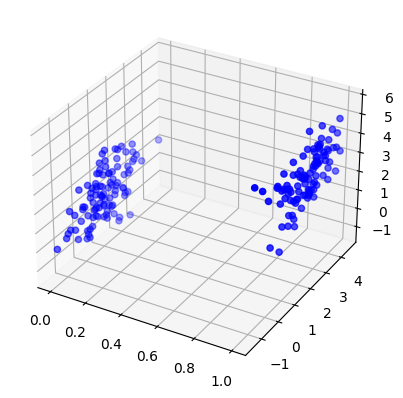

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df[0], df[1],df[2], c='b', marker='o')
plt.show()

Судячи з графіку, маємо 2 кластери. Нормалізуємо дані та перетворимо розмірність до 2х:

In [49]:
norm_df = StandardScaler().fit_transform(df)
pd.DataFrame(norm_df).describe().round(5)

,0,1,2
count,200.00000,200.00000,200.00000
mean,0.00000,-0.00000,-0.00000
std,1.00251,1.00251,1.00251
min,-1.00000,-2.62581,-2.22067
25%,-1.00000,-0.71505,-0.78461
50%,0.00000,-0.02355,0.04459
75%,1.00000,0.76209,0.86859
max,1.00000,2.26029,2.19249


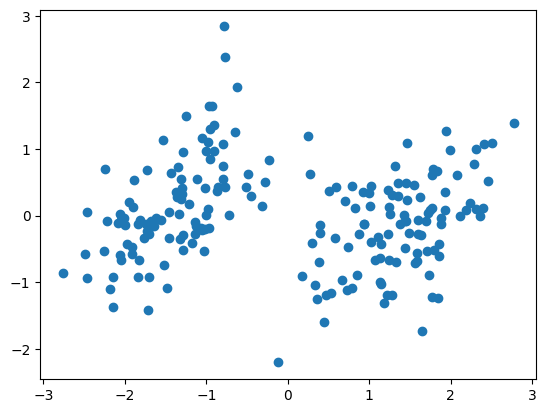

In [50]:
df_trans = PCA(n_components=2).fit_transform(norm_df)
plt.scatter(df_trans[:, 0], df_trans[:, 1])
plt.title
plt.show()

Для визначення кількості кластерів використаємо Elbow Method:

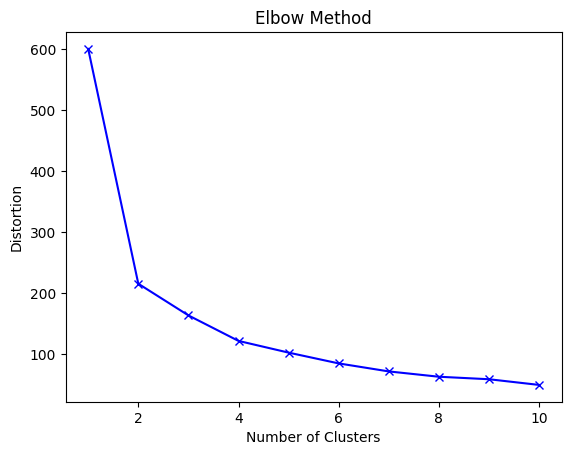

In [65]:
distortion = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(norm_df)
    distortion.append(kmeans.inertia_)

plt.plot(range(1, 11), distortion, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

Найвиразніше лікоть згибається на 2ці, тож наша теорія підвердилась щодо кластерізації на 2 групи. Кластерізуємо наш датасет за допомогою kmeans-методу:

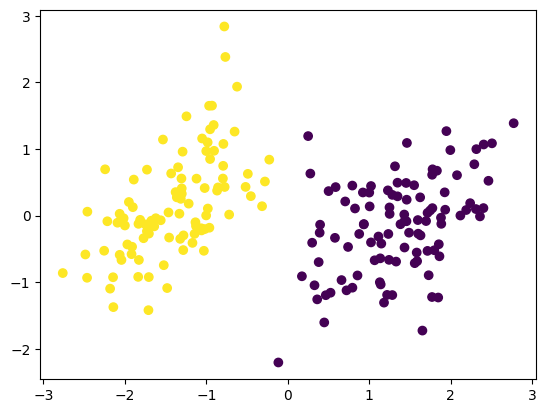

In [52]:
kmeans = KMeans(n_clusters=2).fit(norm_df)
plt.scatter(df_trans[:, 0], df_trans[:, 1], c=kmeans.labels_)
plt.show()

Повторимо цю процедуру з 2гим датасетом:

In [54]:
df2 = pd.read_csv('/content/mnist.csv', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
norm_df2 = pd.DataFrame(StandardScaler().fit_transform(df2))
norm_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.913244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044766,-0.044766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.828259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044766,-0.044766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.176560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044766,-0.044766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.524860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044766,-0.044766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.131658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044766,-0.044766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


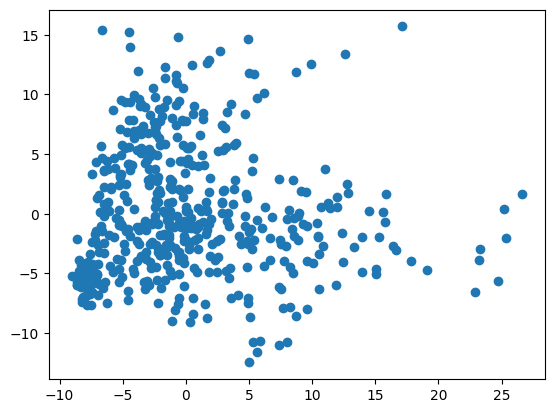

In [60]:
df2_trans = PCA(n_components=2).fit_transform(norm_df2)
plt.scatter(df2_trans[:, 0], df2_trans[:, 1])
plt.show()

Тут на відміну від попереднього датасету кількість кластерів визначити відразу складно. Подивимось що нам "скаже" Elbow Method:

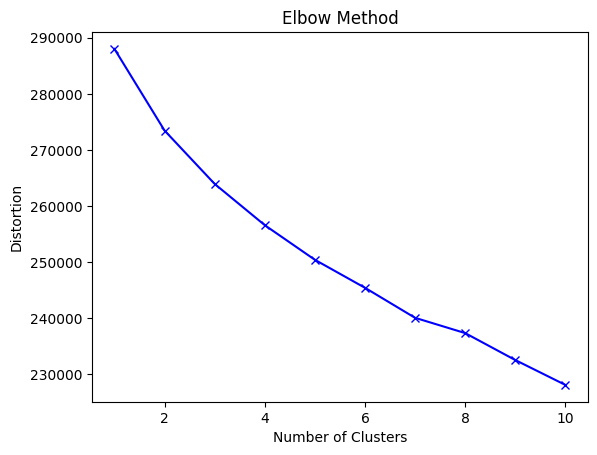

In [64]:
distortion = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(norm_df2)
    distortion.append(kmeans.inertia_)

plt.plot(range(1, 11), distortion, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

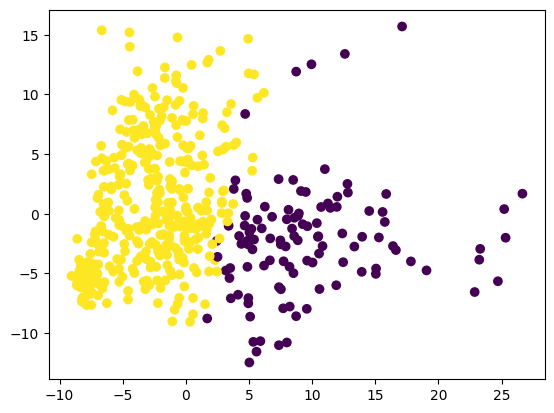

In [67]:
kmeans = KMeans(n_clusters=2).fit(norm_df2)
plt.scatter(df2_trans[:, 0], df2_trans[:, 1], c=kmeans.labels_)
plt.show()

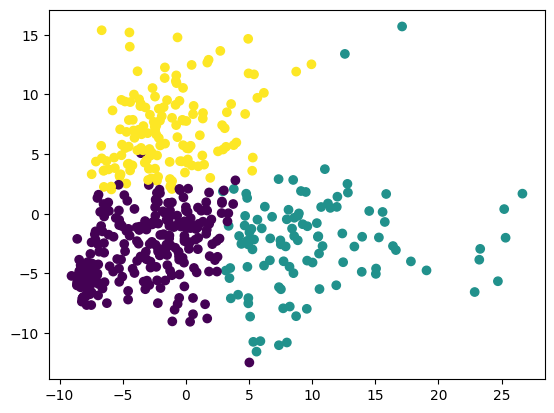

In [68]:
kmeans = KMeans(n_clusters=3).fit(norm_df2)
plt.scatter(df2_trans[:, 0], df2_trans[:, 1], c=kmeans.labels_)
plt.show()

Висновок: на 1шому датасеті вдалось кластерізувати дані більш вдало ніж по 2гому. Навіть після зменення розмірності, нормалізації і експериментування з різною кількостю кластерів, чітко класифікувати 2ий датасет було доволі складно. Я більш схильний до 3 груп.